In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet

import warnings
warnings.filterwarnings("ignore")

/home/shiwen/miniconda3/envs/prophet/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd

data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"

df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")
# df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2964 non-null   object 
 1   y       2964 non-null   float64
dtypes: float64(1), object(1)
memory usage: 46.4+ KB


In [9]:
df

,ds,y
0,2007-12-10,9.5908
1,2007-12-11,8.5196
2,2007-12-12,8.1837
3,2007-12-13,8.0725
4,2007-12-14,7.8936
...,...,...
2959,2016-01-16,7.8172
2960,2016-01-17,9.2739
2961,2016-01-18,10.3338
2962,2016-01-19,9.1259


In [3]:


df['ds'] = pd.DatetimeIndex(df['ds'])
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2964 non-null   datetime64[ns]
 1   y       2964 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.4 KB


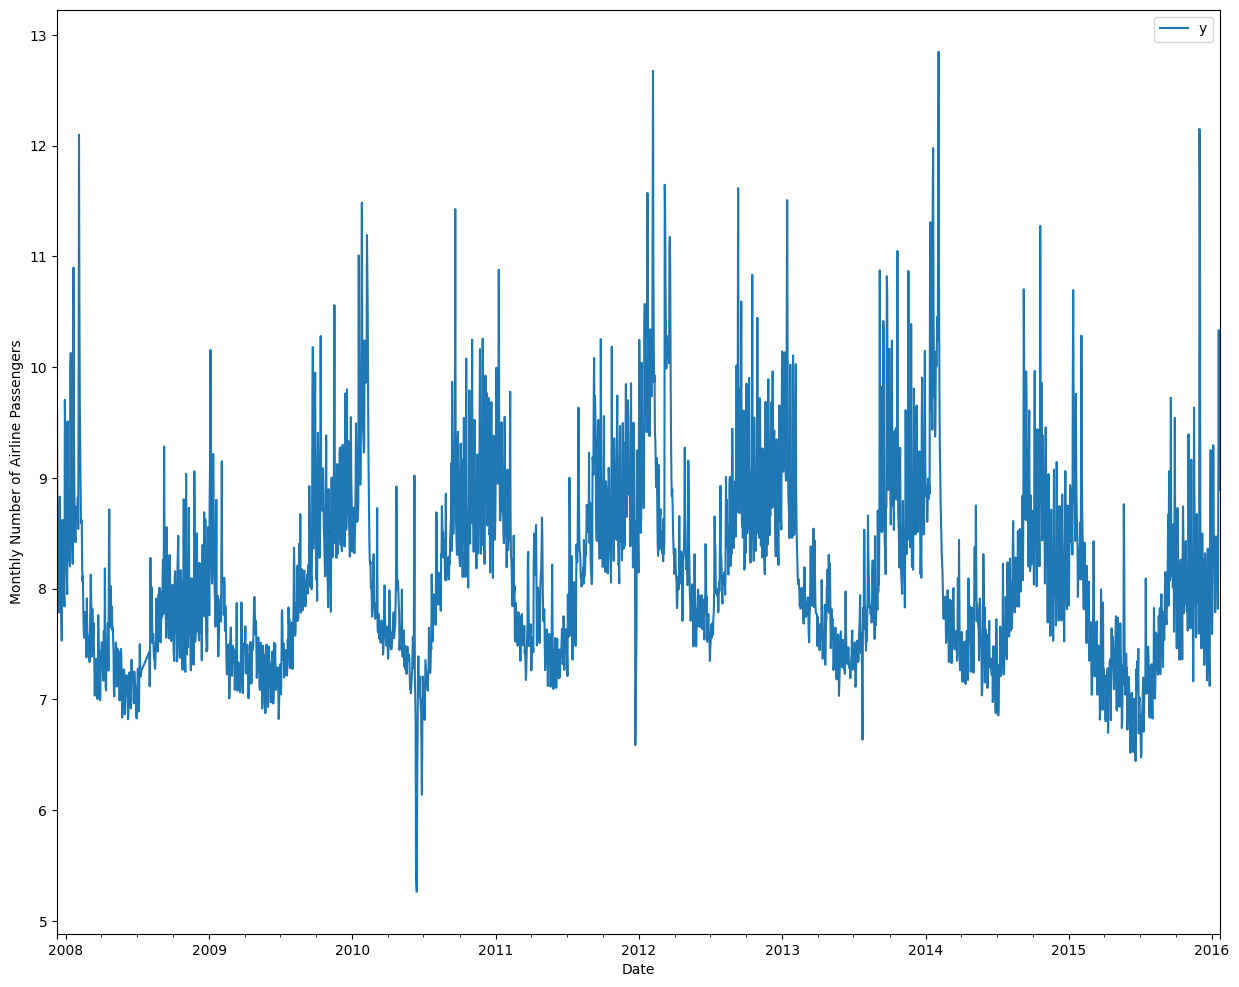

In [4]:


ax = df.set_index('ds').plot(figsize=(15, 12))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()



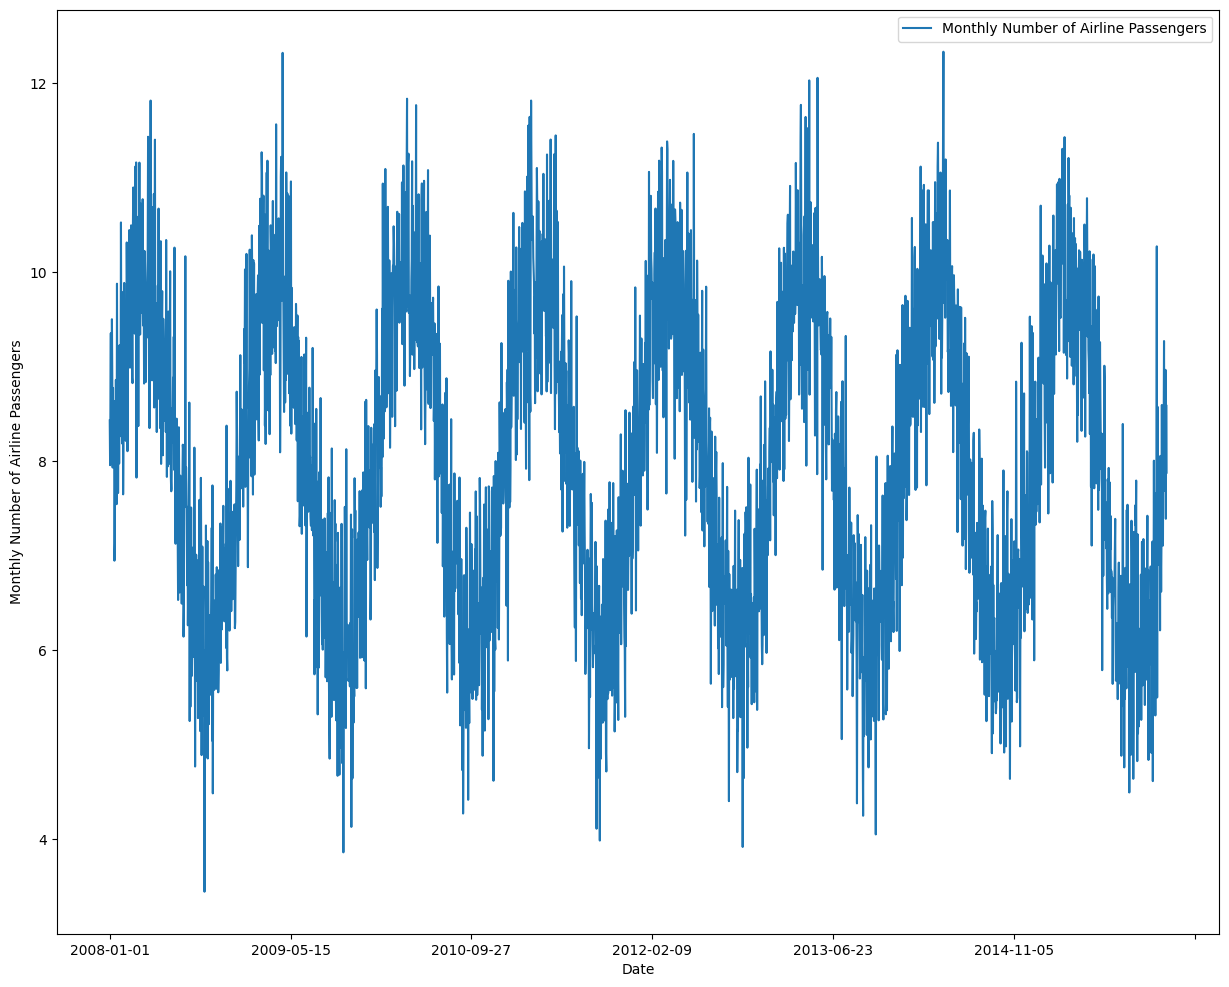

In [18]:
df_reconstruct = pd.read_csv("reconstructed_airline_passengers.csv")



ax = df_reconstruct.set_index('Date').plot(figsize=(15, 12))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()


In [5]:
m = NeuralProphet()
m.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m.fit(df)



INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (NP.forecaster.fit) - Metrics are enabled. Please provide valid metrics logging directory. Setting to CWD
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 80
INFO - (NP.forecaster.fit) - Train Dataset size: 2964
INFO - (NP.forecaster.fit) - Number of batches per training epoch: 47


Training: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.utils_lightning.find_learning_rate) - No Learning Rate provided. Activating learning rate finder
WARNING - (NP.utils_lightning.find_learning_rate) - Learning rate finder: The number of batches per epoch (47) is too small than the required number                 for the learning rate finder (120). The results might not be optimal.
INFO - (NP.utils_lightning.find_learning_rate) - Learning rate finder ---- ARGs: {'min_lr': 1e-06, 'max_lr': 10.0, 'num_training': 120, 'early_stop_threshold': None, 'mode': 'exponential'}
Finding best initial lr: 100%|██████████| 120/120 [00:00<00:00, 261.61it/s]
INFO - (NP.utils_lightning.smooth_loss_and_suggest) - Learning rate finder ---- default suggestion: 0.13593563908785244
INFO - (NP.utils_lightning.smooth_loss_and_suggest) - Learning rate finder ---- steepest: 0.1188502227437018
INFO - (NP.utils_lightning.smooth_loss_and_suggest) - Learning rate finder ---- minimum (not used): 1e-06
INFO - (NP.utils_lightning.smooth_loss_and_suggest) - Lea

Training: |          | 0/? [00:12<?, ?it/s, v_num=2, MAE=0.345, RMSE=0.496, Loss=0.0149, RegLoss=0.000, LR=0.00137]

INFO - (NP.forecaster.fit) - Train Time:   12.486


In [6]:


predicted = m.predict(df)
forecast = m.predict(df)



INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 236.02it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.966% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D



Predicting DataLoader 0: 100%|██████████| 3/3 [00:00<00:00, 208.84it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


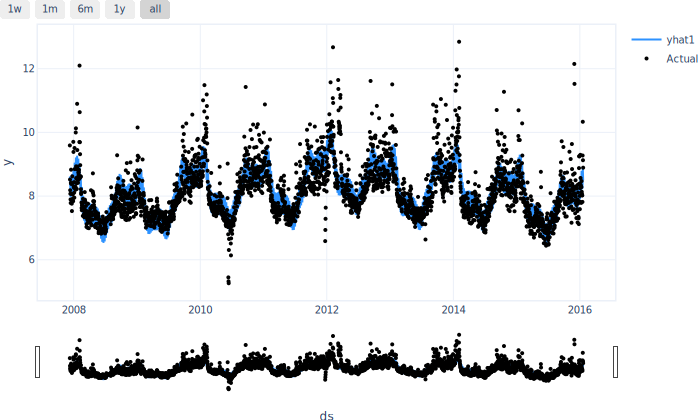

In [7]:
m.plot(forecast)

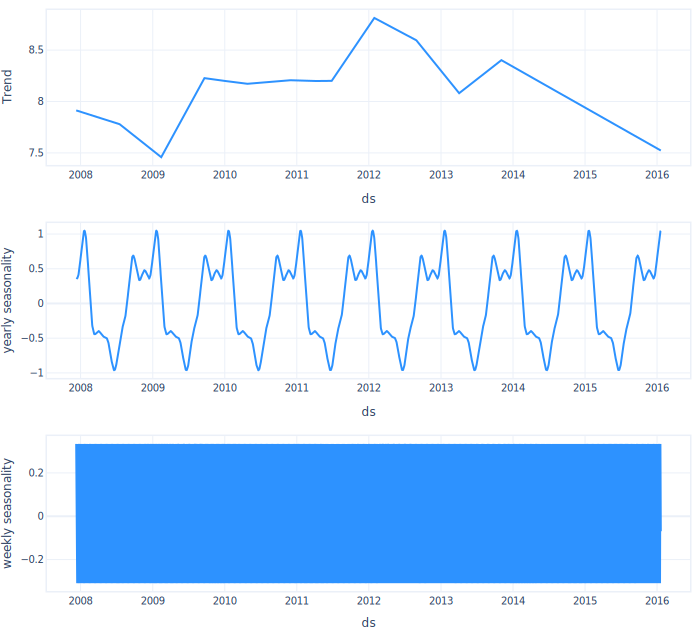

In [8]:
m.plot_components(forecast)

